In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv


### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

2024-10-21 16:21:50.288669: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 16:21:50.288799: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 16:21:50.433811: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Part 1 - Data Preprocessing with EDA

### Importing the dataset

In [3]:
dataset=pd.read_csv(r'/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv')
dataset.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


### Renaming the columns for better understanding

In [4]:
dataset.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  383 non-null    int64 
 1   Gender                               383 non-null    object
 2   Smoking                              383 non-null    object
 3   Smoking History                      383 non-null    object
 4   Radiotherapy History                 383 non-null    object
 5   Thyroid Function                     383 non-null    object
 6   Physical Examination                 383 non-null    object
 7   Adenopathy                           383 non-null    object
 8   Types of Thyroid Cancer (Pathology)  383 non-null    object
 9   Focality                             383 non-null    object
 10  Risk                                 383 non-null    object
 11  Tumor                                383 non-

In [6]:
dataset.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


### Replacing the values with a more summarized data

In [7]:
dataset['Tumor'].replace({'T1a' : 'tumor that is 1 cm or smaller' , 'T1b' : 'tumor larger than 1 cm but not larger than 2 cm' ,
                     'T2' : 'tumor larger than 2 cm but not larger than 4 cm' , 
                     'T3a' : 'tumor larger than 4 cm' ,'T3b' : 'tumor that has grown outside the thyroid' ,
                     'T4a' : 'tumor that has invaded nearby structures' ,
                     'T4b' : 'tumor that has invaded nearby structures'} , inplace =True)

dataset['Lymph Nodes'].replace({'N0' : 'no evidence of regional lymph node metastasis' ,
                     'N1b' : 'regional lymph node metastasis in the central  of the neck' ,
                     'N1a' : 'regional lymph node metastasis in the lateral of the neck'} , inplace =True)

dataset['Cancer Metastasis'].replace({'M0': 'no evidence of distant metastasis' , 'M1' : 'the presence of distant metastasis'} ,inplace =True )

dataset['Stage'].replace({'I' : 'First-Stage' , 'II' : 'Second-Stage' , 'III' : 'Third-Stage', 'IVA' : 'Fourth-Stage-A', 'IVB' : 'Fourth-Stage-B'} ,inplace = True)

### Creating Boxplots to show the outliers

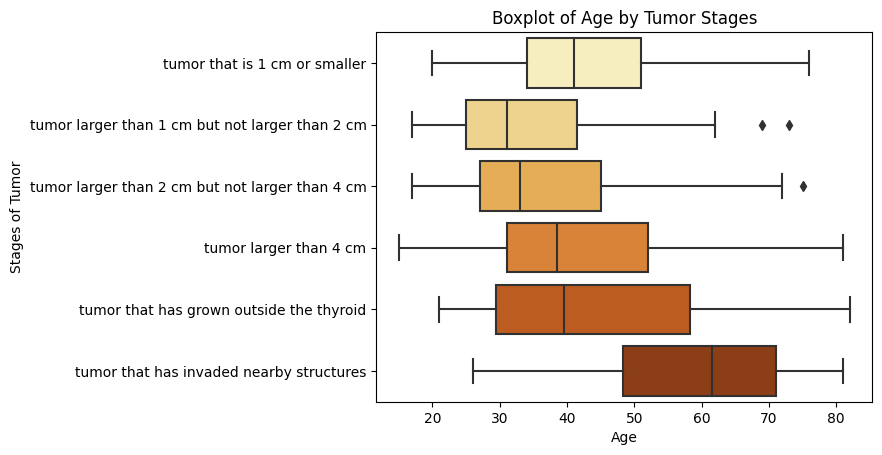

In [8]:
import seaborn as sns

bxt = sns.boxplot(x='Age', y='Tumor', data=dataset, palette="YlOrBr")
bxt.set_title('Boxplot of Age by Tumor Stages')
bxt.set_xlabel('Age')
bxt.set_ylabel('Stages of Tumor')
bxt.tick_params(axis='y', rotation=0)


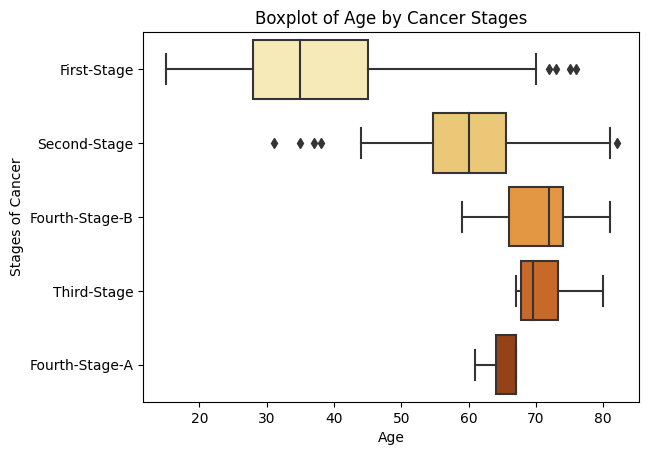

In [9]:
bxs = sns.boxplot(x = 'Age', y = 'Stage', data = dataset, palette = 'YlOrBr')
bxs.set_title('Boxplot of Age by Cancer Stages')
bxs.set_xlabel('Age')
bxs.set_ylabel('Stages of Cancer')
bxs.tick_params(axis='y', rotation=0)

## Part 2 - Data Visualization

Text(0, 0.5, '')

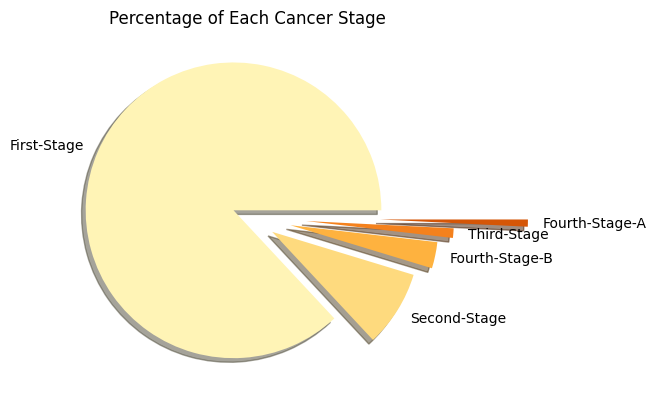

In [10]:
# Pie Charts for Stages
sns.set_palette("YlOrBr")
stages = dataset['Stage'].value_counts()
stage = stages.plot(kind = 'pie', explode = [0.1, 0.2, 0.3, 0.4, 0.9], labels = stages.index, shadow = True)
stage.set_title('Percentage of Each Cancer Stage')
stage.set_ylabel('')

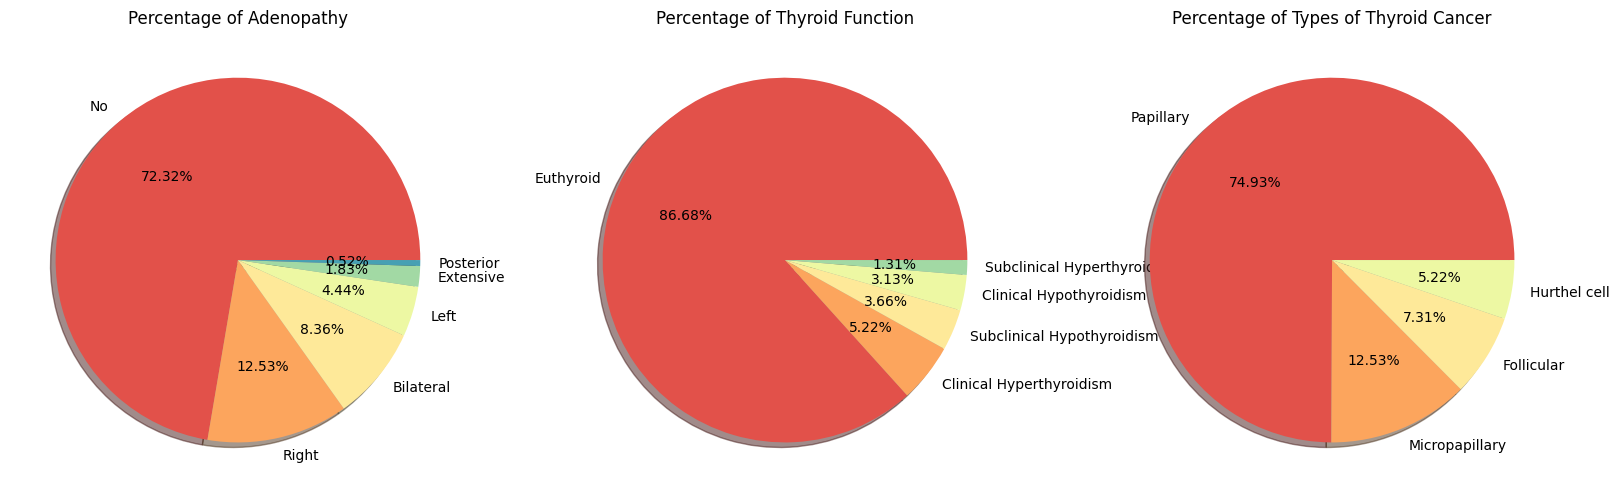

In [11]:
import matplotlib.pyplot as plt
sns.set_palette('Spectral')
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Pie chart for Adenopathy
adeno = dataset['Adenopathy'].value_counts()
adeno.plot(kind='pie', autopct='%0.2f%%', labels=adeno.index, shadow=True, ax=axes[0])
axes[0].set_title('Percentage of Adenopathy')
axes[0].set_ylabel('')

# Pie chart for Thyroid Function
thy = dataset['Thyroid Function'].value_counts()
thy.plot(kind='pie', autopct='%0.2f%%', labels=thy.index, shadow=True, ax=axes[1])
axes[1].set_title('Percentage of Thyroid Function')
axes[1].set_ylabel('')

# Pie chart for Types of Thyroid Cancer
path = dataset['Types of Thyroid Cancer (Pathology)'].value_counts()
path.plot(kind='pie', autopct='%0.2f%%', labels=path.index, shadow=True, ax=axes[2])
axes[2].set_title('Percentage of Types of Thyroid Cancer')
axes[2].set_ylabel('')

plt.show()

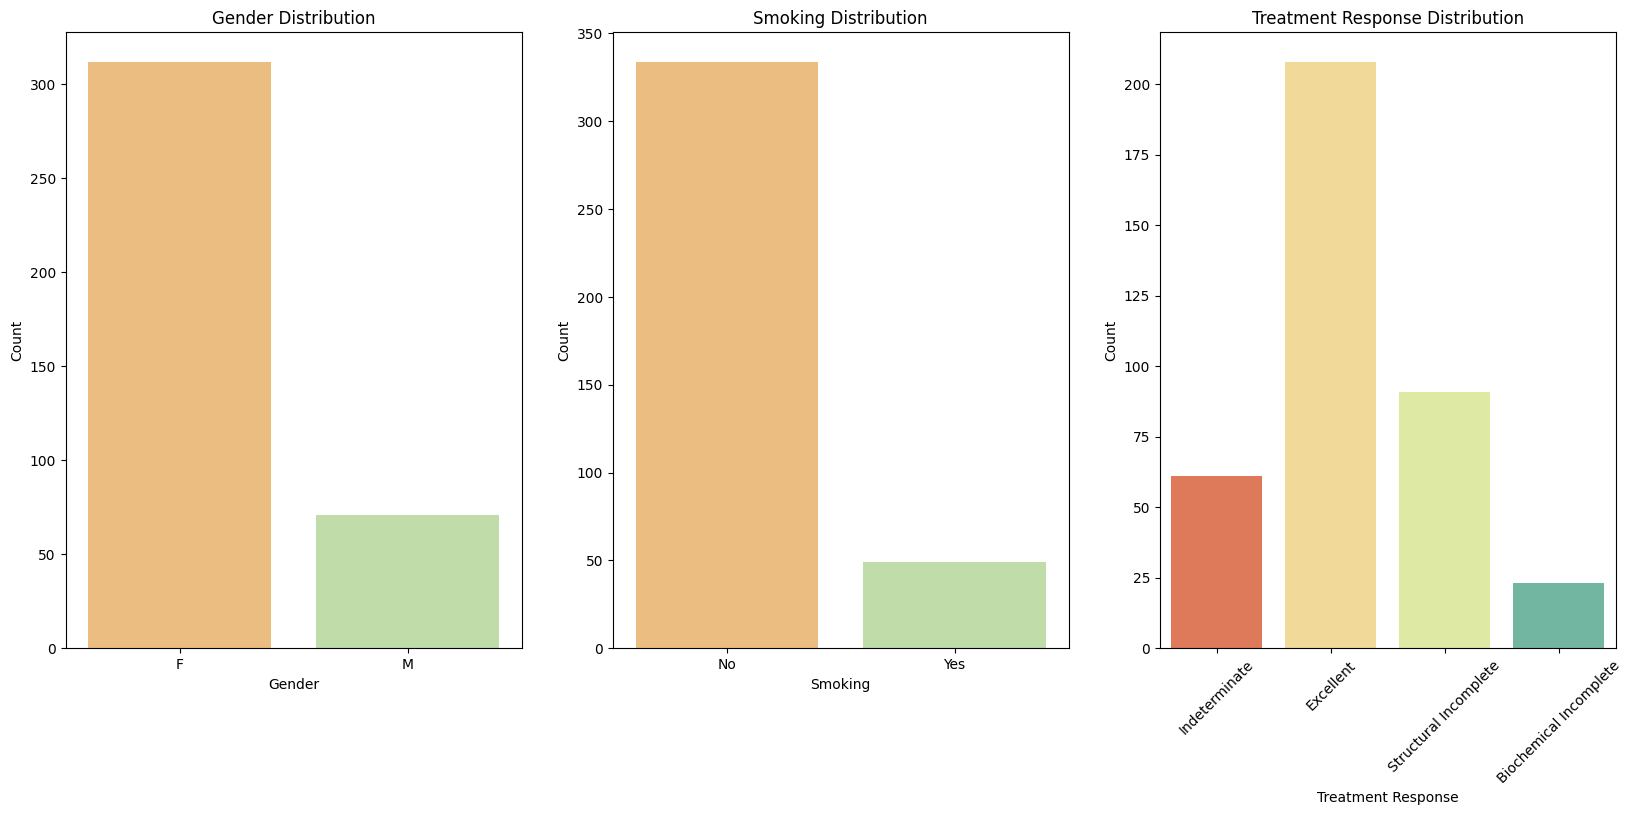

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

#Display the count of patients in each gender category.
sns.countplot(x='Gender', data=dataset, palette='Spectral', ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.countplot(x='Smoking', data=dataset, palette='Spectral', ax=axes[1])
axes[1].set_title('Smoking Distribution')
axes[1].set_xlabel('Smoking')
axes[1].set_ylabel('Count')

sns.countplot(x='Treatment Response', data=dataset, palette='Spectral',  ax=axes[2])
axes[2].set_title('Treatment Response Distribution')
axes[2].set_xlabel('Treatment Response')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)
plt.show()

### Following Insights were found among these visualizations are:
* Majority of the Patients are Female who have Thyroid Cancer
* Majority of the Patients are non-smokers which means that smoking have less chance of affect on the thyroid cancer
* Majority of the Patients are recovering at an alarming rate

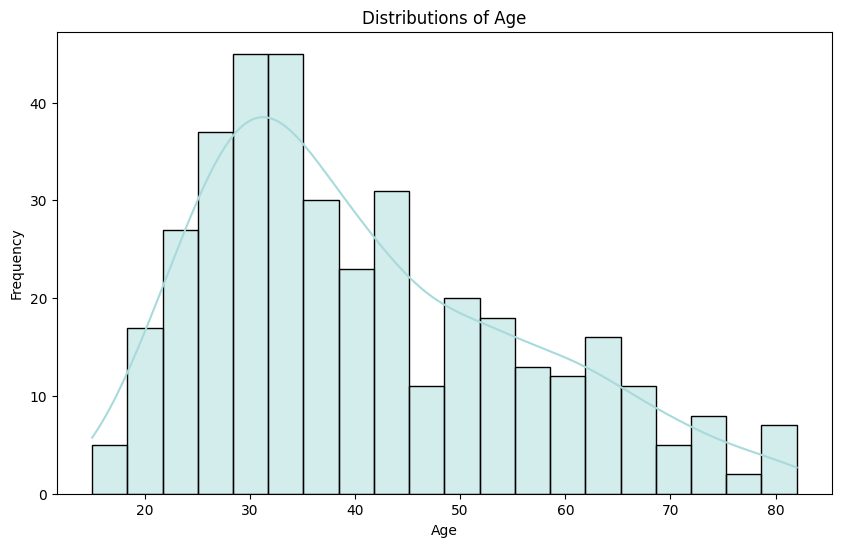

In [13]:
# Visualizing the distribution of ages using a histogram.
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age'], bins=20, kde=True, color = '#a9dadb')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distributions of Age')
plt.show()

**Here we can conclude that the majority of patients are 28-35 years old and the distribution is right skewed (Mean > Median > Mode)**

## Part 3 - Additional Data Preprocessing

In [14]:
pd.set_option('display.max_columns', 100)
dataset.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No


### Making Dummy Variables and Label Encoding

In [15]:
dataset = pd.get_dummies(dataset,columns=['Thyroid Function','Physical Examination','Adenopathy','Types of Thyroid Cancer (Pathology)','Focality','Tumor','Lymph Nodes','Cancer Metastasis'])

In [16]:
from sklearn.preprocessing import LabelEncoder
categ = ['Gender','Smoking','Smoking History','Radiotherapy History','Risk','Stage','Treatment Response','Recurred']
# Encode Categorical Columns
le = LabelEncoder()
dataset[categ] = dataset[categ].apply(le.fit_transform)

In [17]:
dataset.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Risk,Stage,Treatment Response,Recurred,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Diffuse goiter,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Types of Thyroid Cancer (Pathology)_Follicular,Types of Thyroid Cancer (Pathology)_Hurthel cell,Types of Thyroid Cancer (Pathology)_Micropapillary,Types of Thyroid Cancer (Pathology)_Papillary,Focality_Multi-Focal,Focality_Uni-Focal,Tumor_tumor larger than 1 cm but not larger than 2 cm,Tumor_tumor larger than 2 cm but not larger than 4 cm,Tumor_tumor larger than 4 cm,Tumor_tumor that has grown outside the thyroid,Tumor_tumor that has invaded nearby structures,Tumor_tumor that is 1 cm or smaller,Lymph Nodes_no evidence of regional lymph node metastasis,Lymph Nodes_regional lymph node metastasis in the central of the neck,Lymph Nodes_regional lymph node metastasis in the lateral of the neck,Cancer Metastasis_no evidence of distant metastasis,Cancer Metastasis_the presence of distant metastasis
0,27,0,0,0,0,2,0,2,0,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,True,False
1,34,0,0,1,0,2,0,1,0,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,True,False
2,30,0,0,0,0,2,0,1,0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,True,False
3,62,0,0,0,0,2,0,1,0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,True,False
4,62,0,0,0,0,2,0,1,0,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,True,False


In [18]:
X = dataset.drop('Recurred', axis =1).values 
y = dataset['Recurred'].values

In [19]:
X

array([[27, 0, 0, ..., False, True, False],
       [34, 0, 0, ..., False, True, False],
       [30, 0, 0, ..., False, True, False],
       ...,
       [72, 1, 1, ..., False, False, True],
       [61, 1, 1, ..., False, True, False],
       [67, 1, 1, ..., False, True, False]], dtype=object)

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 4 - Building the ANN

### Initializing the ANN

In [23]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [24]:
ann.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))

### Adding the second hidden layer

In [25]:
ann.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))

### Adding the output layer

In [26]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid')) 

## Part 5 - Training the ANN

### Compiling the ANN

In [27]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [28]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 30)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4756 - loss: 0.7263
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7288 - loss: 0.5982 
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8280 - loss: 0.5272 
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8538 - loss: 0.4374 
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3885 
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8727 - loss: 0.3327 
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8788 - loss: 0.2918 
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8979 - loss: 0.2689 
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8966 - loss: 0.2421 
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9035 - loss: 0.2410 
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9252 - loss: 0.2021 
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9119 - loss: 0.2065 
Ep

## Part 6 - Making the predictions and evaluating the model

### Predicting the Test set results

In [29]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  2]
 [ 4 26]]


0.9375

### Predicting the result of a single observation

**Here I'm gonna Predict a single observation from dataset to see how much our Neural Network is efficient**

In [31]:
# dataset.head(1) # I'm gonna take first row as a single observation

In [32]:
print(X[0])

[27 0 0 0 0 2 0 2 False False True False False False False False True
 False False False False True False False False False True False False
 True False False False False False True True False False True False]


In [33]:
print(y[0])

0


In [34]:
print(ann.predict(sc.transform([[27, 0, 0, 0, 0, 2, 0 ,2, False, False ,True ,False, False, False ,False ,False ,True,
 False, False ,False ,False ,True ,False ,False ,False, False ,True, False, False,
 True ,False ,False ,False, False, False ,True ,True ,False ,False ,True, False]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[False]]


**Here as we can see that the Neural Network has perfectly predicted the result**